In [1]:
import os, sys
import re
import h5py
import corner
import numpy as np
import pandas as pd
import vallog as vl
import matplotlib.pyplot as plt


In [13]:
msg = vl.Logger()

In [3]:
input_file: str = input("path/to/hdf5/file: ")
if input_file == "":
    input_file = "../data/gambit-output/FS_MSSM7atQ/samples/MSSM7atQ.hdf5"
if not os.path.exists(input_file):
    raise FileNotFoundError(f"File {input_file} does not exist.")
if "hdf5" not in input_file:
    raise ValueError(f"File {input_file} is not a hdf5 file.")

msg.log(f"Inspecting file {input_file}", vl.info)

[Info]                  Inspecting file
                        /home/valentin/mssmscanning/data/gambit-output/MSSM7-random-3-21425584/FS-MSSM7-random.hdf5


In [14]:
hdf5 = h5py.File(input_file, "r")['MSSM']
hdf5_df = pd.DataFrame({key: hdf5[key][:] for key in hdf5.keys()})
input_parameters = []
pattern = re.compile(r'#MSSM.*atQ_parameters @MSSM.*atQ::primary_parameters::(?!.*_isvalid).*$')
for key in hdf5.keys():
    print(key)
    match = pattern.search(key)
    if match:
        input_parameters.append(match.group())

labels = [string.split('::')[-1] for string in input_parameters]
parameter_df = hdf5_df[input_parameters]
parameter_df.columns = labels
parameter_df = parameter_df.loc[:, parameter_df.nunique() > 2]


mask = hdf5_df["LogLike_isvalid"] == 1
hdf5_df_valid = hdf5_df[mask]
valid_models = parameter_df[mask]



msg.log(f"number of generated models: {hdf5_df.shape[0]}", vl.info)
msg.log(f"number of valid models: {valid_models.shape[0]}", vl.info)
valid_models


#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::Ad_3
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::Ad_3_isvalid
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::Au_3
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::Au_3_isvalid
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::M2
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::M2_isvalid
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::Qin
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::Qin_isvalid
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::SignMu
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::SignMu_isvalid
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::TanBeta
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::TanBeta_isvalid
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::mHd2
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::mHd2_isvalid
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::mHu2
#MSSM7atQ_parameters @MSSM7atQ::primary_parameters::mHu2_isvalid
#MSSM7atQ_parameters

,Ad_3,Au_3,M2,TanBeta,mHd2,mHu2,mf2
3,421.749455,425.876242,-112.475527,46.526951,1.983126e+06,-1.003226e+06,3.069153e+06
4,2501.000514,189.627206,-325.188069,27.378799,1.991172e+06,-2.009483e+06,2.875902e+06
10,477.930662,-2879.172405,346.591097,14.226723,7.775171e+05,-1.892004e+06,8.804660e+05
16,4349.859283,-350.433331,237.355244,7.472595,2.181142e+06,-1.205764e+06,5.134332e+04
18,-201.476540,242.753365,120.033829,37.771605,1.160180e+06,-2.457362e+06,1.622376e+06
...,...,...,...,...,...,...,...
50993,3284.804743,479.613627,-629.469420,15.990593,2.069937e+06,-1.469589e+06,1.064872e+06
50995,-1417.232150,145.045066,-183.488386,47.370274,1.271408e+06,-1.380472e+06,9.516985e+06
50996,229.751267,-928.357032,151.980003,18.809114,1.033313e+06,-1.741867e+06,6.533304e+05
50998,4.059541,109.600476,180.814424,23.400460,1.746890e+06,-1.699692e+06,3.898381e+05


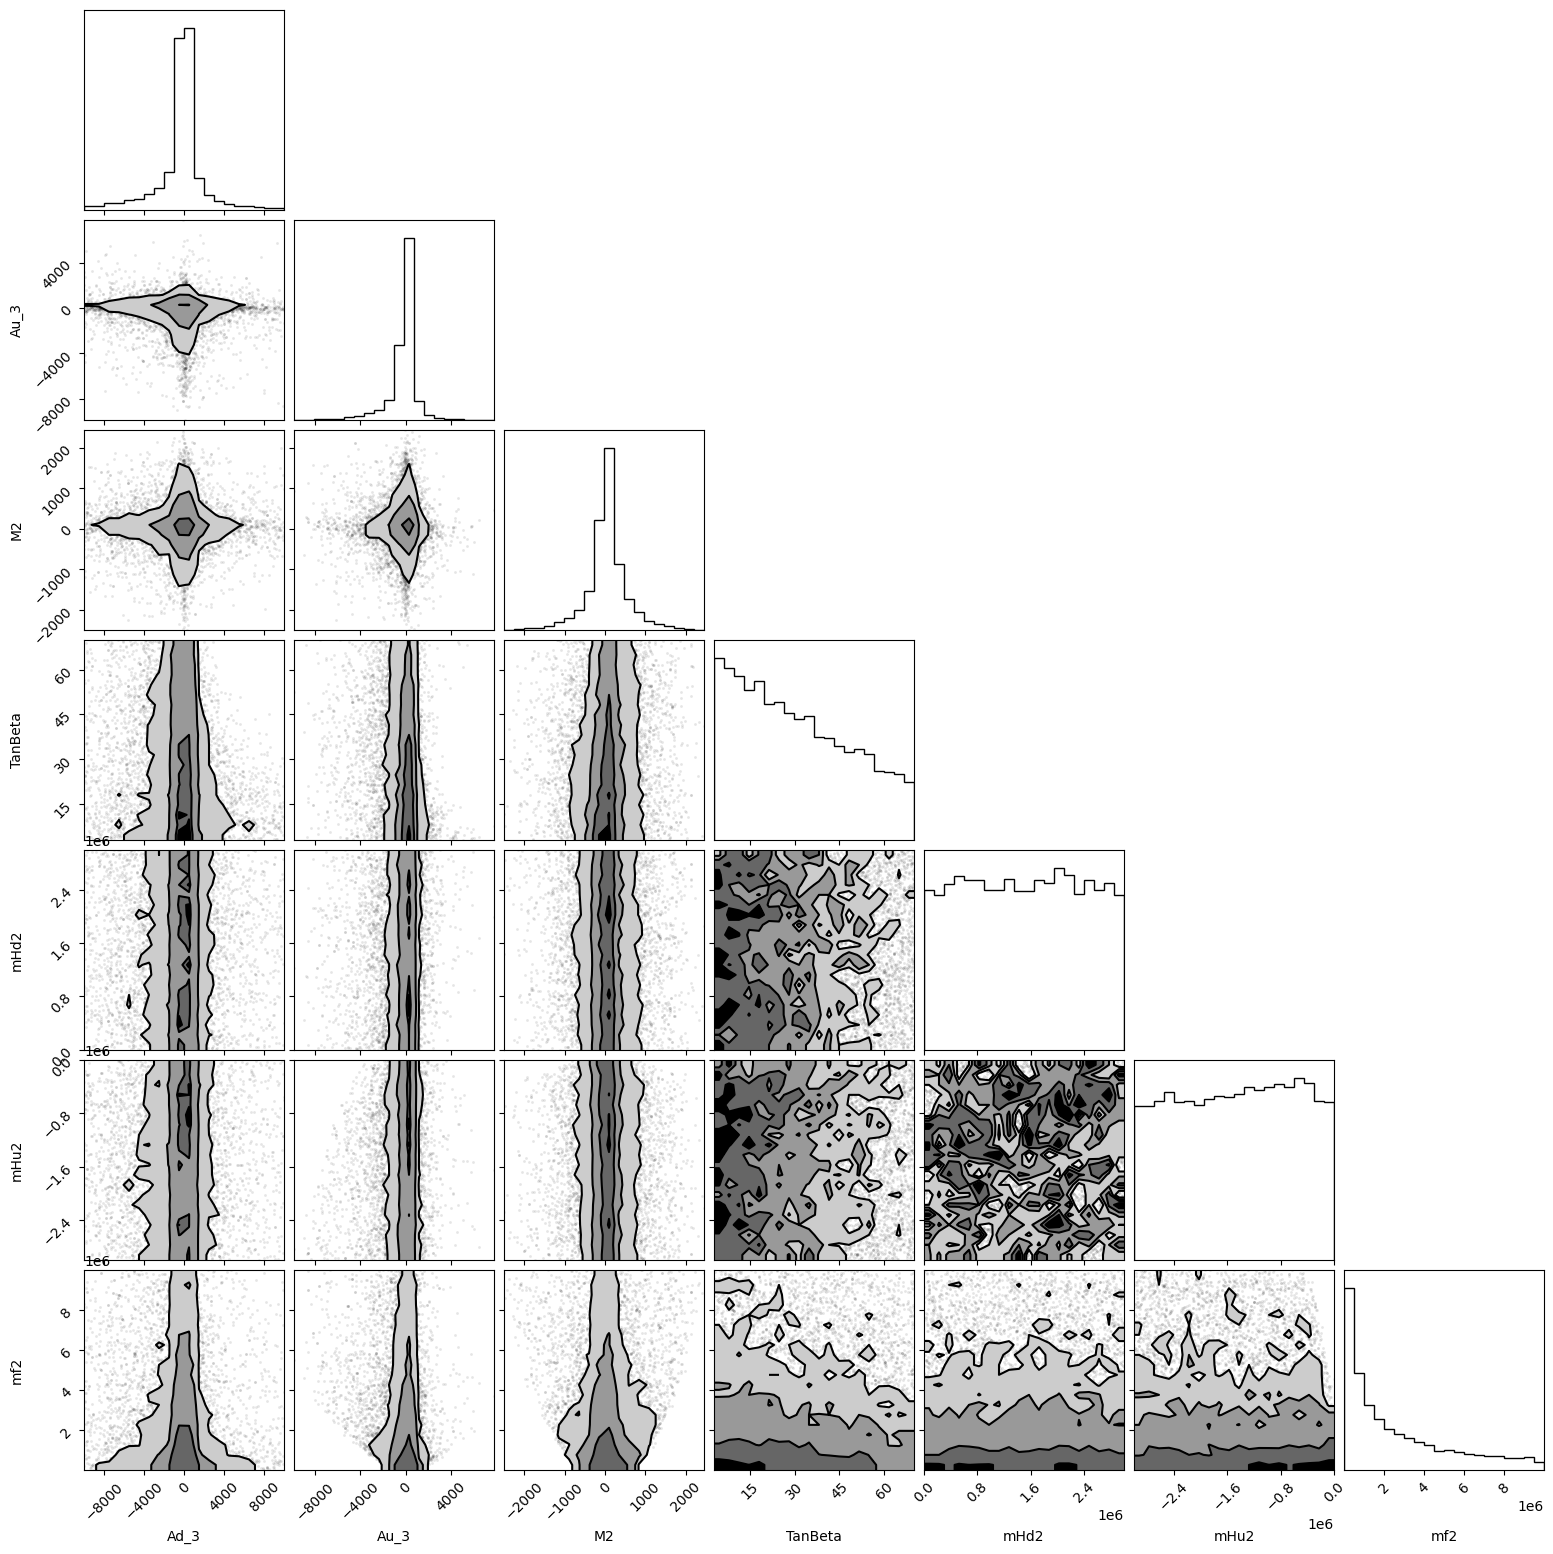

In [15]:
corner_fig = corner.corner(valid_models, labels=parameter_df.columns, fill_contours=True, plot_density=True)
corner_fig.savefig(f"plots/gambit-{input_file.split('/')[-1]}-spectrum-corner.png")

In [16]:
atlas_run2_ranges = {
    "Qin": 2000,
    "SignMu": 1,
    "TanBeta": [1,60],
    "mHu2": [-5000, 5000],
    "mHd2": [-5000, 5000],
    "M1": [-2000, 2000],
    "M2": [-2000, 2000],
    "M3": [1000, 5000],
    "mq2_12": 10000,
    "mq2_3": [2000, 5000],
    "ml2_12": 10000,
    "ml2_3": 10000,
    "md2_12": 10000,
    "md2_3": [2000, 5000],
    "mu2_12": 10000,
    "mu2_3": [2000, 5000],
    "Ae_3": [-2000, 2000],
    "Ad_3": [-2000, 2000],
    "Au_3": [-8000, 8000]
    }

In [17]:
minima = valid_models.min()
maxima = valid_models.max()
atlas_compatible_models = pd.DataFrame()
for parameter, range in atlas_run2_ranges.items():
    if parameter in valid_models.columns:
        atlas_compatible_models[parameter]  = valid_models[parameter].between(range[0], range[1])
boundary_table = pd.DataFrame({
    "Min": minima,
    "Max": maxima,
    #"inside ALTAS bounds": ,
})
boundary_table["inside ALTAS bounds"] = [atlas_compatible_models[parameter].sum() if parameter in atlas_compatible_models.columns else "NaN" for parameter in boundary_table.index]
boundary_table

,Min,Max,inside ALTAS bounds
Ad_3,-9.975341e+03,9.945169e+03,8785
Au_3,-9.844389e+03,7.753355e+03,11325
M2,-2.495383e+03,2.445706e+03,11290
TanBeta,3.000664e+00,6.999682e+01,10402
mHd2,-8.630953e+02,2.999579e+06,25
mHu2,-2.999158e+06,9.231576e+02,26
mf2,8.946570e+03,9.997424e+06,NaN


In [18]:
parameter = "#MSSM_spectrum @SpecBit::get_MSSM_spectrum_as_map::A0 Pole_Mass"

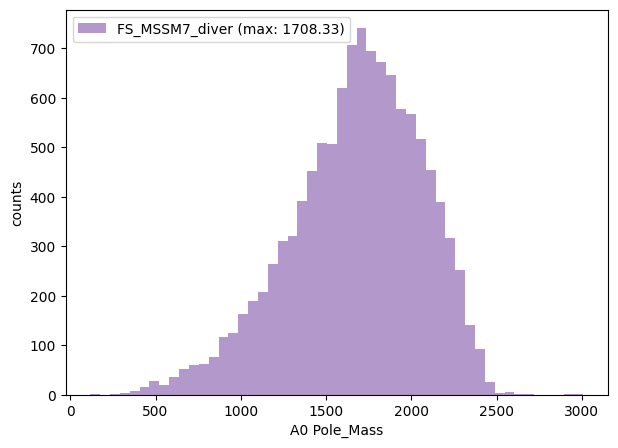

In [23]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

ax.set_xlabel(parameter.split('::')[-1])
ax.set_ylabel("counts")

counts, bins, _ = ax.hist(hdf5_df_valid[parameter], bins=50, color="rebeccapurple", alpha=0.5)
max_index = np.argmax(counts)
max_bin_center = (bins[max_index] + bins[max_index + 1]) / 2
label = input_file.split('/')[-1].split('.')[0] + f' (max: {max_bin_center:.2f})'

ax.legend([label])
plt.show()